In [1]:
pip install vit-keras


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=b6591f15f59d30d28d9b261802f06ec1f254377621f7b85103d45ab2fe770a6d
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow-addons


     -------------------------------------- 746.7/746.7 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

METRICS = [
    metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
    metrics.TrueNegatives(name='tn'),
    metrics.FalseNegatives(name='fn'),
    metrics.BinaryAccuracy(name='accuracy'),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc')
]

BATCH_SIZE = 42
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory('./outdata/train',
                                                    target_size=IMG_SIZE,
                                                    color_mode='rgb',
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = train_datagen.flow_from_directory('./outdata/val',
                                                  target_size=IMG_SIZE,
                                                  color_mode='rgb',
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical',
                                                  shuffle=True)

classes = train_generator.class_indices
class_list = list(classes.keys())


model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
for layer in model.layers:
    layer.trainable = False

flatten = tf.keras.layers.Flatten()(model.output)
dense = tf.keras.layers.Dense(28, activation='relu')(flatten)
dropout = tf.keras.layers.Dropout(0.85)(dense)
outputs = tf.keras.layers.Dense(2, activation='softmax')(dropout)

model = tf.keras.Model(inputs=model.input, outputs=outputs)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=METRICS)

step_size_train = train_generator.n // train_generator.batch_size
model_history = model.fit(train_generator,
                          validation_data=val_generator,
                          steps_per_epoch=step_size_train,
                          epochs=4)

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

Found 1155 images belonging to 2 classes.
Found 290 images belonging to 2 classes.
Epoch 1/4
27/27 [==============================] - 501s 19s/step - loss: 1.0376 - tp: 629.0000 - fp: 473.0000 - tn: 640.0000 - fn: 484.0000 - accuracy: 0.5701 - precision: 0.5708 - recall: 0.5651 - auc: 0.5727 - val_loss: 0.6133 - val_tp: 197.0000 - val_fp: 93.0000 - val_tn: 197.0000 - val_fn: 93.0000 - val_accuracy: 0.6793 - val_precision: 0.6793 - val_recall: 0.6793 - val_auc: 0.7291
Epoch 2/4
27/27 [==============================] - 477s 18s/step - loss: 0.6762 - tp: 700.0000 - fp: 434.0000 - tn: 700.0000 - fn: 434.0000 - accuracy: 0.6173 - precision: 0.6173 - recall: 0.6173 - auc: 0.6460 - val_loss: 0.5629 - val_tp: 229.0000 - val_fp: 61.0000 - val_tn: 229.0000 - val_fn: 61.0000 - val_accuracy: 0.7897 - val_precision: 0.7897 - val_recall: 0.7897 - val_auc: 0.8513
Epoch 3/4
27/27 [==============================] - 439s 16s/step - loss: 0.6785 - tp: 662.0000 - fp: 451.0000 - tn: 662.0000 - fn: 451.0000

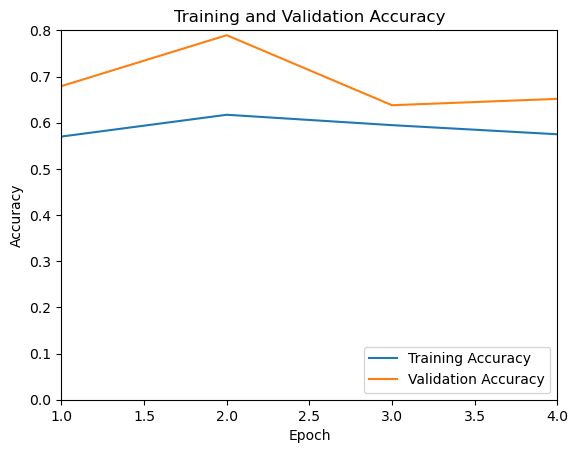

<Figure size 640x480 with 0 Axes>

In [20]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(range(1,len(acc)+1),acc, label='Training Accuracy')
plt.plot(range(1,len(val_acc)+1),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([1,4])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Accuracy.png")


[0.6132645606994629, 0.5629280209541321, 0.6299432516098022, 0.609294056892395]


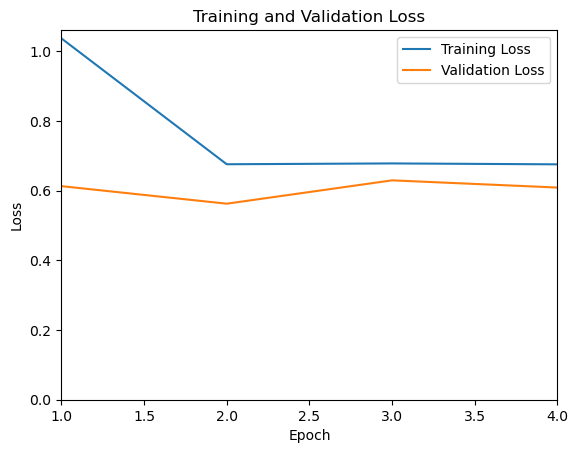

<Figure size 640x480 with 0 Axes>

In [14]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([1, 4])  
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Loss.png")

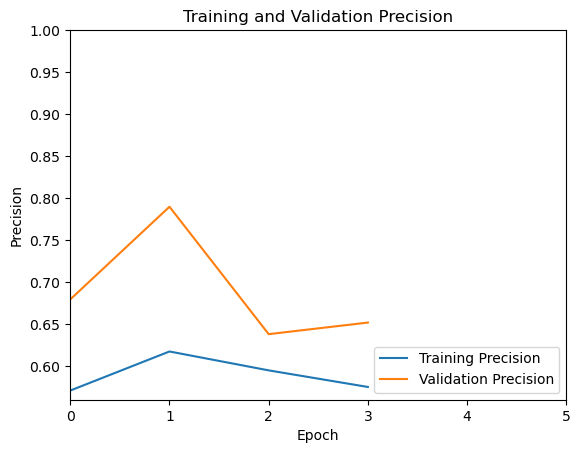

<Figure size 640x480 with 0 Axes>

In [21]:
pre = model_history.history['precision']
val_pre = model_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,5])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Precision.png")

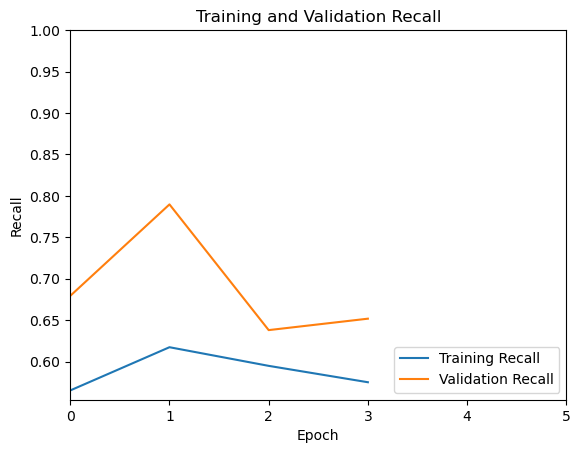

<Figure size 640x480 with 0 Axes>

In [22]:
rec = model_history.history['recall']
val_rec = model_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,5])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Recall.png")

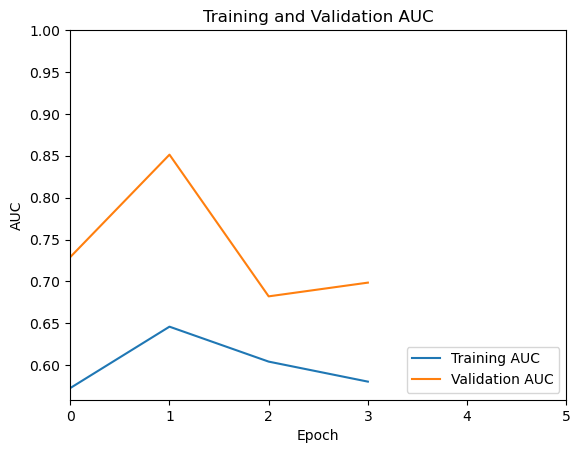

<Figure size 640x480 with 0 Axes>

In [23]:
auc = model_history.history['auc']
val_auc = model_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,5])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Auc.png")

7/7 [==============================] - 112s 16s/step


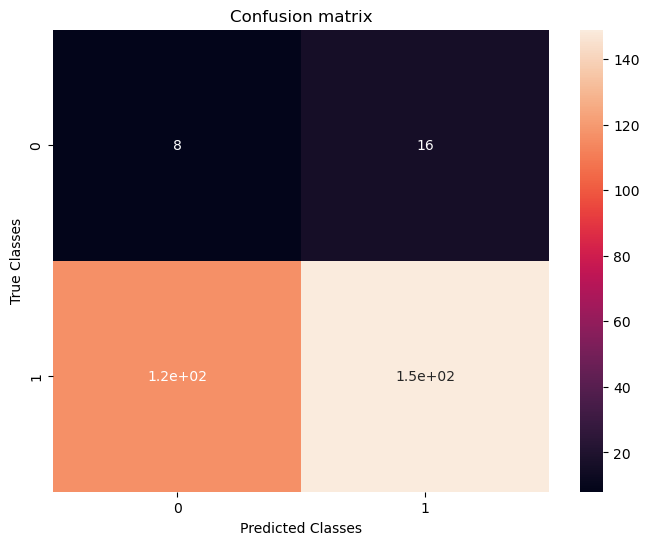

In [24]:
p = model.predict(val_generator)
p = np.argmax(p, axis=1)
y_true = val_generator.classes
c = confusion_matrix(p, y_true)

plt.figure(figsize=(8,6))
plt.title('Confusion matrix')
sns.heatmap(c, annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.plot()
plt.savefig("model_Confusion_matrix.png")

In [25]:
model.save("VT_model.h5")